In [32]:
import timeit

import matplotlib.pyplot as plt
import numpy as np

from hospital_resident import HospitalResident as HR1
from matching.games import HospitalResident as HR2

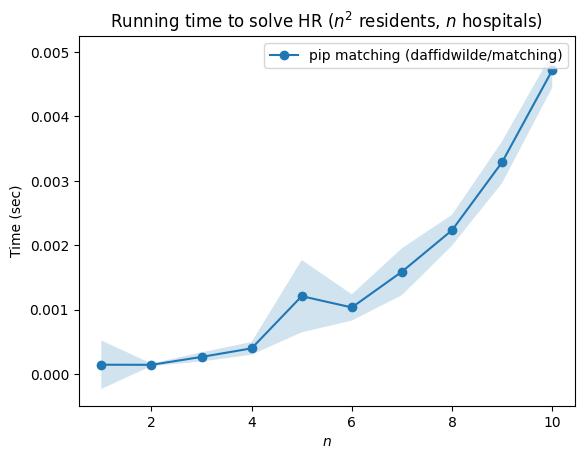

In [46]:
def sim_HR2(n_values, number = 3, repeat=100):
    setup = """
from hospital_resident import HospitalResident as HR1
from matching.games import HospitalResident as HR2
"""

    stmt = """
hr = HR1.generate(n * n, n)
game = HR2.create_from_dictionaries(*hr.to_dicts())
game.solve()
"""

    means = []
    stdevs = []

    for n in n_values:
        times = timeit.repeat(stmt, setup=setup + f'\nn={n}', number=number, repeat=repeat)
        mean = np.mean(times) / number
        stdev = np.std(times) / number
        means.append(mean)
        stdevs.append(stdev)

    means = np.array(means)
    stdevs = np.array(stdevs)

    return means, stdevs

n_values = list(range(1, 11, 1))

means, stdevs = sim_HR2(n_values)

plt.plot(n_values, means, marker='o', label='pip matching (daffidwilde/matching)')
plt.fill_between(n_values, means + stdevs, means - stdevs, alpha=0.2)
plt.title('Running time to solve HR ($n^2$ residents, $n$ hospitals)')
plt.gca().set_xlabel('$n$')
plt.gca().set_ylabel('Time (sec)')
plt.legend()
plt.show()

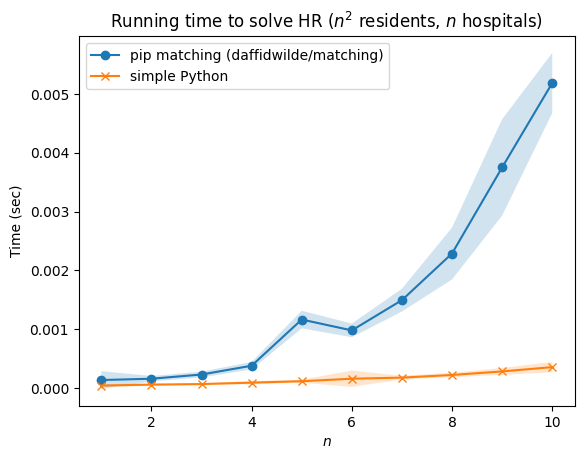

In [52]:
def sim_HR1(n_values, number = 3, repeat=100):
    setup = """
from hospital_resident import HospitalResident as HR1
"""

    stmt = """
hr = HR1.generate(n * n, n)
hr.solve()
"""

    means = []
    stdevs = []

    for n in n_values:
        times = timeit.repeat(stmt, setup=setup + f'\nn={n}', number=number, repeat=repeat)
        mean = np.mean(times) / number
        stdev = np.std(times) / number
        means.append(mean)
        stdevs.append(stdev)

    means = np.array(means)
    stdevs = np.array(stdevs)

    return means, stdevs

n_values = list(range(1, 11, 1))

means, stdevs = sim_HR2(n_values)
plt.plot(n_values, means, marker='o', label='pip matching (daffidwilde/matching)')
plt.fill_between(n_values, means + stdevs, means - stdevs, alpha=0.2)

means, stdevs = sim_HR1(n_values)
plt.plot(n_values, means, marker='x', label='simple Python')
plt.fill_between(n_values, means + stdevs, means - stdevs, alpha=0.2)

plt.title('Running time to solve HR ($n^2$ residents, $n$ hospitals)')
plt.gca().set_xlabel('$n$')
plt.gca().set_ylabel('Time (sec)')
plt.legend()
plt.show()

In [56]:
from hospital_resident import HospitalResident as HR1
from matching.games import HospitalResident as HR2

def run_HR1(n):
    hr = HR1.generate(n * n, n)
    hr.solve()

def run_HR2(n):
    hr = HR1.generate(n * n, n)
    game = HR2.create_from_dictionaries(*hr.to_dicts())
    game.solve()

def run_none(n):
    hr = HR1.generate(n * n, n)
    game = HR2.create_from_dictionaries(*hr.to_dicts())

def run_none2(n):
    hr = HR1.generate(n * n, n)
    hr.to_dicts()

n = 20
%timeit -n 5 -r 10 run_HR1(n)
%timeit -n 5 -r 10 run_HR2(n)
%timeit -n 5 -r 10 run_none(n)
%timeit -n 5 -r 10 run_none2(n)

2.89 ms ± 624 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
91.1 ms ± 2.86 ms per loop (mean ± std. dev. of 10 runs, 5 loops each)
59.3 ms ± 5.34 ms per loop (mean ± std. dev. of 10 runs, 5 loops each)
988 µs ± 241 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
